In [121]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math

In [122]:
# Input
image=cv2.imread('lowRes.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [123]:
# compare the enhanced image with the original one
def show(ori,new,newName):
    fig=plt.figure(figsize=(10,7))
    fig.add_subplot(1,2,1)
    plt.imshow(ori)
    plt.axis('off')
    plt.title("Original")
    fig.add_subplot(1,2,2)
    plt.imshow(new)
    plt.axis('off')
    plt.title(newName)

In [124]:
# Unsharp
def unsharp(image):
    blurred=cv2.GaussianBlur(image,(5,5),0)
    unsharped=cv2.addWeighted(image,2.2,blurred,-1.0, 0)
    return unsharped

In [125]:
# Sharpen
def sharpen(image):
    laplacian=np.array([[-1,-1,-1],
                        [-1,9,-1],
                        [-1,-1,-1]])
    sharpenByLaplacian=cv2.filter2D(image,-1,laplacian)
    return sharpenByLaplacian

In [132]:
# Edge enhancement
def edgeEnhance(image):
    def getLapla(inputs):
        ans=0
        laplacian=np.array([[-1,-1,-1],
                            [-1,9.12,-1],
                            [-1,-1,-1]])
        for i in range(inputs.shape[0]):
            for j in range(inputs.shape[1]):
                ans+=inputs[i,j]*laplacian[i,j]
        return ans

    # detect edges in grayscale
    gray=cv2.cvtColor(blurred,cv2.COLOR_RGB2GRAY)
    edges=cv2.Canny(gray,20,40)

    # enhance those edges by applying sharpening them
    edgeEnhanced=image.copy()
    H,W,colors=image.shape
    for i in range(1,H-1):
        for j in range(1,W-1):
            # found an edge, sharpen it
            if edges[i][j]==255:
                for color in range(colors):
                    edgeEnhanced[i,j,color]=getLapla(image[i-1:i+2,j-1:j+2,color])

    return edgeEnhanced

In [133]:
unsharped=unsharp(image)
sharpened=sharpen(image)
edgeEnhanced=edgeEnhance(image)

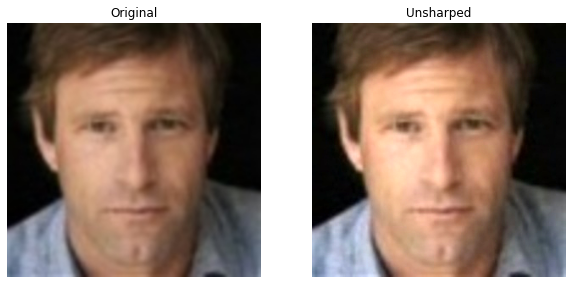

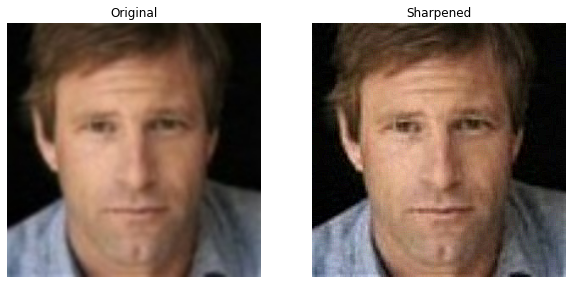

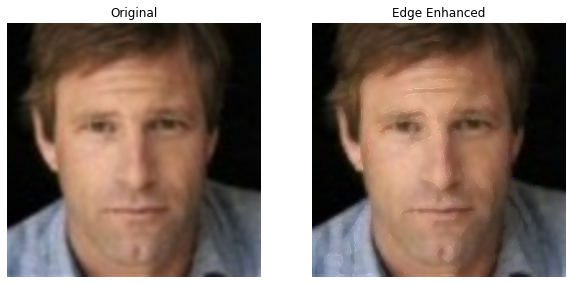

In [134]:
show(image,unsharped,"Unsharped")
show(image,sharpened,"Sharpened")
show(image,edgeEnhanced,"Edge Enhanced")